<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CIFAR-10 dataset

[CIFAR Website](https://www.cs.toronto.edu/~kriz/cifar.html)

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck




In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

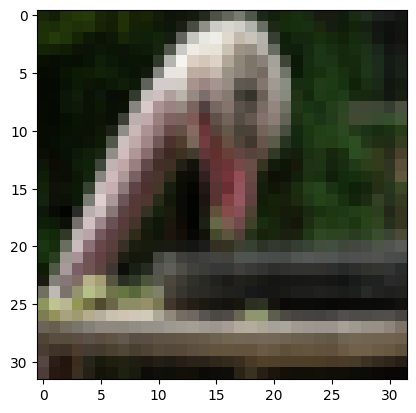

In [5]:
plt.imshow(X_train[400])

##Scale

In [6]:
X_train = X_train/255

In [7]:
X_test = X_test/255

##Transpose y to categorical

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_categorical_train = to_categorical(y_train, num_classes=10)
y_categorical_test = to_categorical(y_test, num_classes=10)

##Create and compile Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [11]:
model = Sequential()

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
model.add(Conv2D(activation="relu",
                 filters=32,
                 kernel_size=(4,4),
                 input_shape=(32,32,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(activation="relu",
                 filters=32,
                 kernel_size=(4,4),
                 input_shape=(32,32,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
callback = EarlyStopping()

In [19]:
model.fit(X_train,
          y_categorical_train,
          epochs=15,
          validation_data=(X_test, y_categorical_test),
          callbacks=[callback])

Epoch 1/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3900 - accuracy: 0.5010 - val_loss: 1.2472 - val_accuracy: 0.5560
Epoch 2/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1178 - accuracy: 0.6072 - val_loss: 1.0890 - val_accuracy: 0.6148
Epoch 3/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9725 - accuracy: 0.6612 - val_loss: 0.9958 - val_accuracy: 0.6543
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8648 - accuracy: 0.6990 - val_loss: 0.9540 - val_accuracy: 0.6761
Epoch 5/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7746 - accuracy: 0.7284 - val_loss: 0.9845 - val_accuracy: 0.6640


In [20]:
model.evaluate(X_test, y_categorical_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9845 - accuracy: 0.6640


[0.9845255017280579, 0.6639999747276306]

In [27]:
preds = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, preds))

In [32]:
y_test.shape

(10000, 1)

In [33]:
preds.shape

(10000, 10)

In [34]:
preds = np.argmax(preds, axis=1).reshape(-1, 1)

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1000
           1       0.87      0.72      0.79      1000
           2       0.55      0.62      0.58      1000
           3       0.43      0.53      0.47      1000
           4       0.66      0.58      0.61      1000
           5       0.48      0.64      0.55      1000
           6       0.78      0.73      0.75      1000
           7       0.73      0.71      0.72      1000
           8       0.76      0.78      0.77      1000
           9       0.77      0.71      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.69      0.66      0.67     10000



<Axes: >

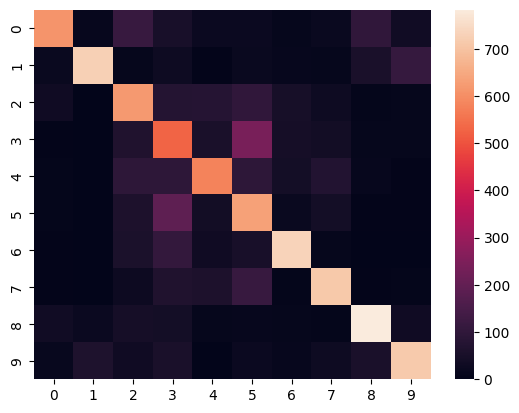

In [37]:
sns.heatmap(confusion_matrix(y_test, preds))

In [46]:
test_image=np.random.randint(0, 10000)

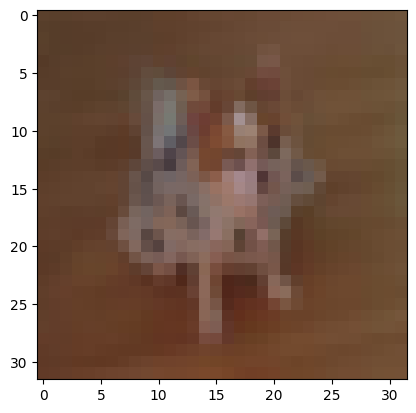

In [47]:
plt.imshow(X_test[test_image])

In [41]:
X_test[test_image].shape

(32, 32, 3)

In [ ]:
X_test[test_image].reshape(1,32,32,3)

In [48]:
pred = model.predict(X_test[test_image].reshape(1,32,32,3))

np.argmax(pred, axis=1)

1/1 [==============================] - 0s 21ms/step


array([5])